In [15]:
# Imports

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
# Import images
IMG_SIZE = 254
BATCH_SIZE = 32

train_path = "covid_normal_split/train"
val_path = "covid_normal_split/val"
test_path = "covid_normal_split/test"

img_editor = ImageDataGenerator(
    rescale = 1./255
)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

train_gen = train_datagen.flow_from_directory(
    train_path, target_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, class_mode="binary"
)


val_gen = img_editor.flow_from_directory(
    val_path,
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "binary"
)

test_gen = img_editor.flow_from_directory(
    test_path,
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "binary",
    shuffle = False
)

Found 9665 images belonging to 2 classes.
Found 2070 images belonging to 2 classes.
Found 2073 images belonging to 2 classes.


In [25]:
# Create CNN Model

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary output
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/Users/taniarizwan/Desktop/CovidPrediction/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 252, 252, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 124, 124, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │     7,372,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,466,177 (28.48 MB)

 Trainable params: 7,466,177 (28.48 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    callbacks=[early_stop]
)

Epoch 1/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 248s 813ms/step - accuracy: 0.7417 - loss: 0.5332 - val_accuracy: 0.7768 - val_loss: 0.4311
Epoch 2/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 248s 819ms/step - accuracy: 0.7725 - loss: 0.4718 - val_accuracy: 0.8290 - val_loss: 0.3712
Epoch 3/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 230s 757ms/step - accuracy: 0.8023 - loss: 0.4205 - val_accuracy: 0.8275 - val_loss: 0.3594
Epoch 4/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 230s 760ms/step - accuracy: 0.8141 - loss: 0.3945 - val_accuracy: 0.8836 - val_loss: 0.2719
Epoch 5/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 211s 697ms/step - accuracy: 0.8368 - loss: 0.3575 - val_accuracy: 0.8923 - val_loss: 0.2742
Epoch 6/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 209s 688ms/step - accuracy: 0.8370 - loss: 0.3488 - val_accuracy: 0.8763 - val_loss: 0.2646
Epoch 7/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 210s 694ms/step - accuracy: 0.8547 - loss: 0.3209 - val_accuracy: 0.8744 - val_loss: 0.3158
Epoch 8/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 217s 714ms/step - accuracy: 0.8657 -

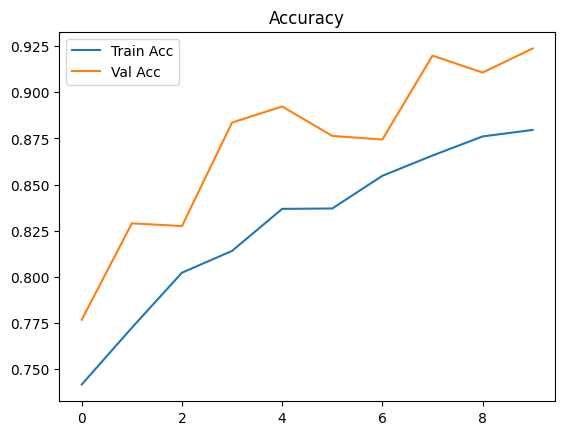

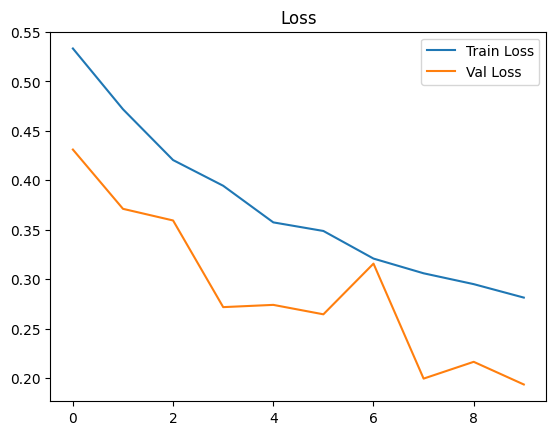

(<matplotlib.legend.Legend at 0x16806fce0>, Text(0.5, 1.0, 'Loss'), None)

In [29]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(), plt.title("Accuracy"), plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(), plt.title("Loss"), plt.show()


In [30]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

y_true = test_gen.classes
y_pred_probs = model.predict(test_gen)
y_pred = (y_pred_probs > 0.5).astype(int)

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=["Normal", "COVID"], yticklabels=["Normal", "COVID"])
plt.xlabel("Predicted"), plt.ylabel("True"), plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_true, y_pred, target_names=["Normal", "COVID"]))


ModuleNotFoundError: No module named 'sklearn'

In [10]:
# Import Images

def import_images(path):
    imgs = []
    for file in glob.glob(path):
        img = Image.open(file, 'r')
        img = img.resize((256, 256))
        img = np.array(img)
        IMG = img.ravel()
        imgs.append(IMG)
    
    return imgs

# Normal XRay Images
normal_images_path = "COVID-19_Radiography_Dataset/Normal/masks/*.png"
normal_images_arr = import_images(normal_images_path)
print(len(normal_images_arr)) # Must = 10192

# COVID XRay Images
covid_images_path = "COVID-19_Radiography_Dataset/COVID/masks/*.png"
covid_images_arr = import_images(covid_images_path)
print(len(covid_images_arr)) # Must equal 3616 

10192
3616
